In [1]:
using Revise
using Plots
using ITensors
using QuantumNaturalGradient
using QuantumNaturalfPEPS

[ Info: Precompiling QuantumNaturalfPEPS [8cccb88f-824b-4ada-bd77-4bd123faaa4e]
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [3]:
# PEPS(Lx,Ly,phys_dim,bond_dim) generates a PEPS with dimensions Lx * Ly, physical dimension = phys_dim and bond dimension bond_dim
L = 3
hilbert = siteinds("S=1/2", L, L) # Check why it gives errors if used with this
peps = PEPS(Float64, hilbert; bond_dim=1) 

PEPS(L=(3, 3), bond_dim=1, sample_dim=1, contract_dim=3, double_contract_dim=2)

In [4]:
QuantumNaturalfPEPS.update_double_layer_envs!(peps)

2-element Vector{QuantumNaturalfPEPS.Environment}:
 QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=65|"Link,l=9"), (dim=1|id=788|"-1"))
[2] ((dim=1|id=32|"-1"), (dim=1|id=87|"Link,l=12"), (dim=1|id=65|"Link,l=9"))
[3] ((dim=1|id=714|"-1"), (dim=1|id=87|"Link,l=12"))
, -0.6026543072064008)
 QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=660|"Link,l=9"), (dim=1|id=559|"-1"))
[2] ((dim=1|id=174|"Link,l=12"), (dim=1|id=660|"Link,l=9"), (dim=1|id=245|"-1"))
[3] ((dim=1|id=174|"Link,l=12"), (dim=1|id=874|"-1"))
, -1.413732042752206)

In [5]:
S, pc, et = QuantumNaturalfPEPS.get_sample(peps)

([0 1 1; 0 0 0; 0 1 0], -2.0136453397972525, QuantumNaturalfPEPS.Environment[QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=892|"Link,l=1"), (dim=1|id=993|"Link,l=7"))
[2] ((dim=1|id=993|"Link,l=7"), (dim=1|id=149|"Link,l=10"), (dim=1|id=831|"Link,l=3"))
[3] ((dim=1|id=149|"Link,l=10"), (dim=1|id=491|"Link,l=5"))
, 0.17805079630453874), QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=110|"Link,l=7"), (dim=1|id=660|"Link,l=2"))
[2] ((dim=1|id=312|"Link,l=4"), (dim=1|id=864|"Link,l=10"), (dim=1|id=110|"Link,l=7"))
[3] ((dim=1|id=853|"Link,l=6"), (dim=1|id=864|"Link,l=10"))
, 0.26845611011965775)])

In [6]:
QuantumNaturalfPEPS.get_logψ_and_envs(peps, S, et)

(-0.6532522634462028 + 3.141592653589793im, QuantumNaturalfPEPS.Environment[QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=892|"Link,l=1"), (dim=1|id=993|"Link,l=7"))
[2] ((dim=1|id=993|"Link,l=7"), (dim=1|id=149|"Link,l=10"), (dim=1|id=831|"Link,l=3"))
[3] ((dim=1|id=149|"Link,l=10"), (dim=1|id=491|"Link,l=5"))
, 0.1780507963045386), QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=126|"Link,l=7"), (dim=1|id=660|"Link,l=2"))
[2] ((dim=1|id=312|"Link,l=4"), (dim=1|id=663|"Link,l=10"), (dim=1|id=126|"Link,l=7"))
[3] ((dim=1|id=853|"Link,l=6"), (dim=1|id=663|"Link,l=10"))
, 0.2684561101196574)], QuantumNaturalfPEPS.Environment[QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=660|"Link,l=2"), (dim=1|id=222|"Link,l=9"))
[2] ((dim=1|id=222|"Link,l=9"), (dim=1|id=408|"Link,l=12"), (dim=1|id=312|"Link,l=4"))
[3] ((dim=1|id=408|"Link,l=12"), (dim=1|id=853|"Link,l=6"))
, -0.9217083735658602), QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=488|"Link,l=9"), (dim=1|id=892|"Link,l=1"))


In [4]:
# Construct a Hamiltonian using OpSum()
# example: Heisenberg

Lx, Ly = size(peps)

ham_heisenberg = OpSum()
for i in 1:Lx-1
    for j in 1:Ly-1
        for t in ["X", "Y", "Z"]
            ham_heisenberg += (-1,t,(i,j),t,(i,j+1)) #structure: (prefactor, operator, position which it acts on, operator, position)
            ham_heisenberg += (-1,t,(i,j),t,(i+1,j))
        end
    end
end

In [7]:
# Construct a Hamiltonian using OpSum()
# easy example: only -Sz so the ground state should have energy -9 

Lx, Ly = size(peps)

ham = OpSum()
for i in 1:Lx
    for j in 1:Ly
        ham += (-1,"Z",(i,j))
    end
end

In [8]:
# this function generates the function needed for the optimization
Oks_and_Eks = generate_Oks_and_Eks(peps, ham) 

(::QuantumNaturalfPEPS.var"#Oks_and_Eks_#40"{TimerOutputs.TimerOutput, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, PEPS, QuantumNaturalGradient.TensorOperatorSum}) (generic function with 1 method)

In [10]:
grad, E_loc, logpsi, S, pc = Oks_and_Eks(flatten(peps), 2)

([-1.161011631649339 0.0 … -0.9622275658211762 0.0; 0.0 1.983306138759291 … -0.962227565821176 0.0], [-1.0, 1.0], ComplexF64[-1.292779431745029 + 0.0im, -1.8282529296777998 + 3.141592653589793im], [[0 0 1; 0 1 0; 1 1 0], [1 0 1; 0 1 0; 1 1 0]], ComplexF64[-2.8238340925560723 - 8.340890040735886e-16im, 4.823834092556071 + 8.340890040735882e-16im])

In [17]:
grad

2×18 Matrix{Float64}:
 -1.16101  0.0      0.724006  0.0  0.0  …  0.0  -0.821268  -0.962228  0.0
  0.0      1.98331  0.724006  0.0  0.0     0.0  -0.821268  -0.962228  0.0

In [ ]:
dt = 0.01  # Time step
eigen_cut = 1e-5  # Eigenvalue cutoff for solver
integrator = QuantumNaturalGradient.Euler(lr=dt)  # Define the integrator with learning rate
solver = QuantumNaturalGradient.EigenSolver(eigen_cut, verbose=true)  # Eigenvalue solver with verbosity

θ = flatten(peps)

# Evolve the system
@time loss_value, θ_opt, misc = QuantumNaturalGradient.evolve(Oks_and_Eks, θ; 
                                        integrator, 
                                        verbosity=2, 
                                        solver, 
                                        sample_nr = 9,  # Number of samples 
                                        maxiter = 10,  # Maximum iterations
                                        );

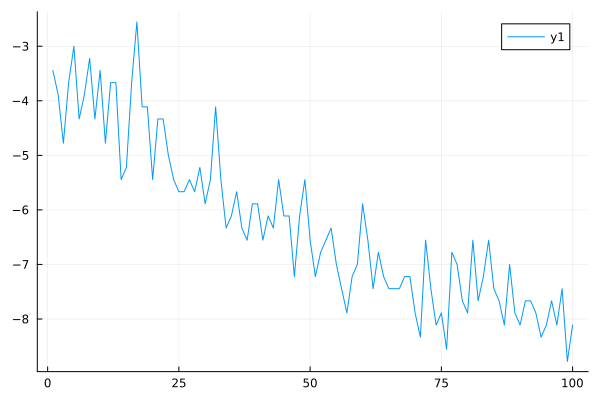

In [15]:
plot(misc["history"][:, 1])